# 01. One-Hot encoding

## 1. One-hot encoding
---

# 02. Softmax Regression

## 1. Multi-class Classification

### 1. logistic regression

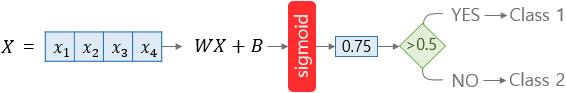

- Sigmoid 함수 : 예측값을 0, 1 사이의 값으로 변환

- 가설: $H(X) = sigmoid(WX + B)$


### 2. Softmax regression

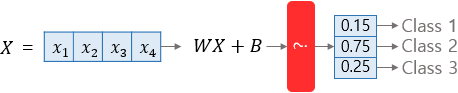

- Softmax 함수 : 확률의 총 합이 1이 되도록 각 클래스에 소수 확률을 활당  

- 가설 : $H(X) = softmax(WX + B)$

    - 선택지의 개수 만큼의 차원을 가지는 벡터를 생성
    - 각 벡터의 모든 원소의 합은 1

---

## 2. Softmax function

- 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정


### 1) Softmax function

- $k$차원의 백터, $i$번째 원소를 $z$, $i$번째 클래스가 정답일 확률을 $P_i$

    - $p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$

- 만약 $k=3$, $z=[z_{1}\ z_{2}\ z_{3}]$ 

    - $ softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값} $
    
    - $p_{1}, p_{2}, p_{3}$의 총합은 1
    
    - $softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = [p_{virginica}, p_{setosa}, p_{versicolor}]$


### 2) 그림을 통한 이해

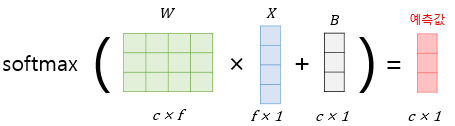

- f: feacture #
- c: class # (One Hot encoding)

---

## 3. 행렬 연산으로 이해 (붓꽃 품종 분류)

$$ \hat{Y} = softmax(XW + B) $$

$$ \left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)
=
softmax\left(
\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)
\right)$$



## 4. Cost function

### 1) 크로스 엔트로피 함수

- $y$ 실제값, $k$ 클래스의 개수, $y_j$ 실제값 원-핫 벡터의 $j$번째 인덱스, $p_j$ 샘플 데이터가 $j$번쨰 클래스읠 확률 $\hat{y}_{j}$

    - $cost(W) = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$
    
    - $cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$


### 2) 이진 분류에서의 크로스 엔트로피 함수

- $cost(W) = -(y\ logH(X) + (1-y)\ log(1-H(X)))$

- k2 -> 로지스틱 회귀의 비용함수와 같아짐

- 소프트맥스 최종 비용함수
$$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}log(p^{(i)}) + (1-y^{(i)})log(1-p^{(i)})]$$

---

# 03. 소프트맥스 회귀의 비용 함수 구현

## 1. PyTorch (low - level)

In [2]:
import torch
import torch.nn.functional as F

torch.manual_seed(1)

In [7]:
z = torch.FloatTensor([1, 2, 3])
hypothesis = F.softmax(z, dim=0)

print(z)
print(hypothesis)
print(hypothesis.sum())

tensor([1., 2., 3.])
tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [15]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1) # dim = 1 두번쨰 차원, 차원에 따라 hypothesis.sum이 달라짐

print(z)
print(hypothesis)
print(hypothesis.sum())

tensor([[0.8553, 0.8163, 0.6291, 0.1581, 0.0801],
        [0.2709, 0.4418, 0.1935, 0.6829, 0.6547],
        [0.3868, 0.6922, 0.6616, 0.8053, 0.8367]], requires_grad=True)
tensor([[0.2690, 0.2587, 0.2145, 0.1339, 0.1239],
        [0.1642, 0.1948, 0.1520, 0.2479, 0.2411],
        [0.1479, 0.2007, 0.1947, 0.2248, 0.2319]], grad_fn=<SoftmaxBackward>)
tensor(3., grad_fn=<SumBackward0>)


In [25]:
y = torch.randint(5, (3,)).long()
print(y)
print(y.unsqueeze(1))

# One hot 생성
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # scatter (dimension, 2번쨰 위치에 1)

tensor([3, 0, 4])
tensor([[3],
        [0],
        [4]])


tensor([[0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.]])

- Softmax 비용 함수

$$ cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) = \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ × (-log(p_{j}^{(i)})) $$

In [26]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.7594, grad_fn=<MeanBackward0>)


## 2. PyTorch (high - level)

### 1. F.softmax() + torch.log() = F.log_softmax()

In [27]:
torch.log(F.softmax(z, dim=1))

tensor([[-1.3131, -1.3522, -1.5393, -2.0104, -2.0883],
        [-1.8066, -1.6357, -1.8840, -1.3946, -1.4227],
        [-1.9112, -1.6058, -1.6364, -1.4927, -1.4613]], grad_fn=<LogBackward>)

In [28]:
F.log_softmax(z, dim=1)

tensor([[-1.3131, -1.3522, -1.5393, -2.0104, -2.0883],
        [-1.8066, -1.6357, -1.8840, -1.3946, -1.4227],
        [-1.9112, -1.6058, -1.6364, -1.4927, -1.4613]],
       grad_fn=<LogSoftmaxBackward>)

### 2. F.log_softmax() + f.nll_log() = F.cross_entropy()

In [31]:
(y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

tensor(1.7594, grad_fn=<MeanBackward0>)

In [32]:
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.7594, grad_fn=<MeanBackward0>)

In [33]:
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.7594, grad_fn=<NllLossBackward>)

In [35]:
F.cross_entropy(z, y)

tensor(1.7594, grad_fn=<NllLossBackward>)

# 04. 소프트맥스 회귀 구현하기

In [38]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

## 1. 소프트맥스 회귀 구현하기 (로우-레벨)

In [39]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [40]:
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [47]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

In [48]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 

    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


## 2. 소프트맥스 회귀 구현하기 (하이-레벨)

In [44]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


## 3. 소프트맥스 회귀 nn.Module로 구현하기

In [45]:
# 모델을 선언 및 초기화. 4개의 특성을 가지고 3개의 클래스로 분류. input_dim=4, output_dim=3.
model = nn.Linear(4, 3)

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


## 4. 소프트맥스 회귀 클래스로 구현하기

In [46]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)

    
model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428281
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818
